# Introduction to Computer Vision

In this session, we will discuss:

- Why is computer vision's primary color red, green blue?
- Why blur an image?
- How to blur an image?
- Different methods to blur an image
- Name that blurred celebrity

In [6]:
# import packages needed
from IPython.display import HTML
import matplotlib.image as mpimg
import numpy as np
import cv2

import matplotlib.pyplot as plt
%matplotlib inline

## Primary Colors in Computer Vision

__Why are red, yellow, and blue the primary colors in painting but computer screens use red, green, and blue?__

This has to do with subtractive and additive color processes. When you look at a piece of white paper, you are seeing all the wavelengths of light (all colors) hitting the piece of paper and reflected back into your eye.  When you look at black paper, the paper absorbs all the colors and reflect very few wavelengths of light back into your eye.  You are seeing the absence of color.

When you look at a pumpkin in a magazine, you're seeing all the light hitting the page and only the orange wavelength reflected back.  The magazine page absorbed/subtracted all the colors except orange.  We mostly experience subtractive color processes when we're walking around in the physical world looking at green grass, red roses and the blue sky.

When you look at a computer screen, the image is not a reflecting light source (i.e. room lighting or the sun).  The computer screen is the light source.  A system that creates light directly is called an "additive" color system since the colors from the different light sources add together to give the final beam of light.

If you display an image of a pumpkin on your computer screen, you have not really turned on any orange-emitting light sources in the screen. Rather, you have turned on tiny red-emitting light sources as well as tiny green-emitting light sources in the screen, and the red and green light add together to make orange.

The cone cells in our eyes come in three varieties: red-detecting, green-detecting, and blue-detecting.  That is the reason that in computer vision we use red, green and blue as the primary colors.

More on colors: https://wtamu.edu/~cbaird/sq/2015/01/22/why-are-red-yellow-and-blue-the-primary-colors-in-painting-but-computer-screens-use-red-green-and-blue

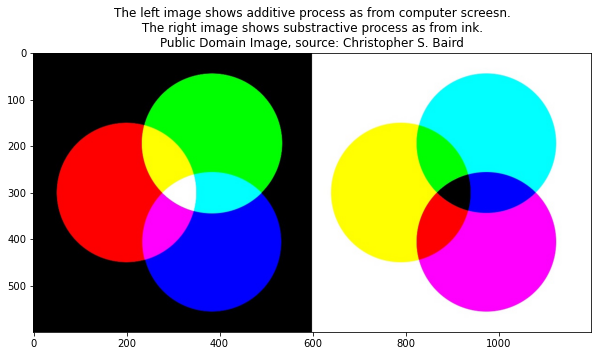

In [2]:
color_mix_img = mpimg.imread('color_mixing.jpg')
plt.rcParams["figure.figsize"] = [10, 8]
plt.imshow(color_mix_img)
plt.title('The left image shows additive process as from computer screesn.\n The right image shows substractive process as from ink. \nPublic Domain Image, source: Christopher S. Baird')
plt.show()

## Why do we need to blur an image?

Typical videos are shot at 24 - 30 frames per second.  When things are moving such as this ball or video shot from a fast moving robot, you will expect the images to be blurred.  If you are building a model or process to detect moving objects in a video, you should take into account that often the images will be blurred.  


In [3]:
from IPython.display import HTML

# Youtube - look at this video at 42 seconds - the yellow ball is blurred.
HTML('<iframe width="560" height="315" src="https://www.youtube.com/embed/9FEZX5OAaYw?rel=0&amp&t=42;controls=1&amp;showinfo=0" frameborder="0" allowfullscreen></iframe>')

/Users/miriam/apps/anaconda/2022.05/anaconda3/envs/py38cv/lib/python3.8/site-packages/IPython/core/display.py:419: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


## What is the mechanishm to blur an image?

Consider this image of a cat, in particular the area of the image outlined by the white square.

Example taken from: https://datacarpentry.org/image-processing/06-blurring/#:~:text=When%20we%20blur%20an%20image,be%20noise%20in%20the%20image.

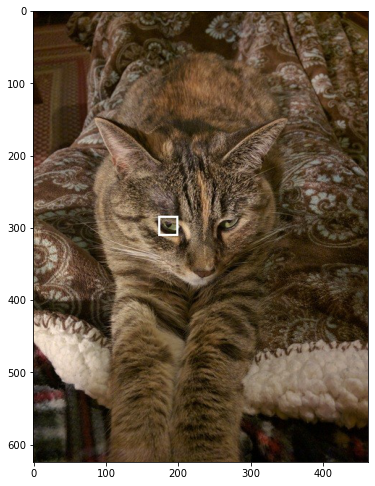

In [4]:
cat_img = mpimg.imread('05-cat-snap.jpg')

plt.rcParams["figure.figsize"] = [6, 15]
plt.imshow(cat_img)
plt.show()

Now, zoom in on the area of the cat’s eye, as shown in the left-hand image below. When we apply a blur filter, we consider each pixel in the image, one at a time. In this example, the pixel we are applying the filter to is highlighted in red, as shown in the right-hand image.

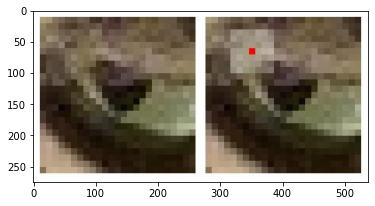

In [5]:
eye_img = mpimg.imread('05-cat-eye-pixels.jpg')

plt.imshow(eye_img)
plt.show()

In a blur, we consider a rectangular group of pixels surrounding the pixel to filter. This group of pixels, called the kernel, moves along with the pixel that is being filtered. So that the filter pixel is always in the center of the kernel, the width and height of the kernel must be odd. In the example shown above, the kernel is square, with a dimension of seven pixels (in this case).

In [6]:
HTML('<iframe width="800" height="272" src="05-blur-demo-animation.gif" frameborder="0" allowfullscreen></iframe>')

We can apply any kind of filters to the square of pixels.  The most common filtering is an average.  
Imagine that we just average all the values in the square of pixels.  This is called __Averaging Blurring__.

Other types of blurring include __Median Blurring__, __Guassian Blurring__ and __Bilateral Blurring__.

## Blur our Road Image

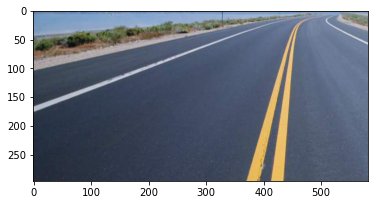

In [7]:
# read in an image
road_img = mpimg.imread('highway_lanes.jpg')

plt.imshow(road_img)
plt.show()

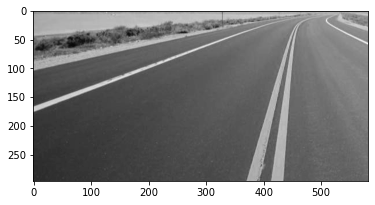

In [8]:
### Grayscale
gray_road_img = cv2.cvtColor(road_img, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_road_img, cmap='gray')
plt.show()

In [9]:
print ("Dimension of the gray road image is ", gray_road_img.ndim)
print ("Image size of the gray road image is %i rows x %i columns" % 
                   (gray_road_img.shape[0], gray_road_img.shape[1]))

Dimension of the gray road image is  2
Image size of the gray road image is 296 rows x 582 columns


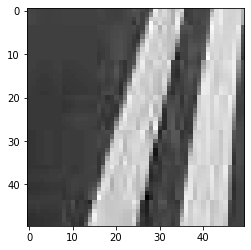

In [10]:
# Take a small slice of this image
small_gray_road_img = gray_road_img[100:150, 400:450]

plt.figure(figsize=(4,4))
plt.imshow(small_gray_road_img, cmap='gray')
plt.show()

In [11]:
nrow = small_gray_road_img.shape[0]
ncol = small_gray_road_img.shape[1]

print ("Dimension of the small gray road image is ", small_gray_road_img.ndim)
print ("Image size of the small gray road image is %i rows x %i columns" % (nrow, ncol))

Dimension of the small gray road image is  2
Image size of the small gray road image is 50 rows x 50 columns


In [12]:
small_gray_road_img

array([[103, 102, 101, ..., 176, 178, 161],
       [103, 102, 101, ..., 176, 179, 159],
       [103, 102, 101, ..., 177, 180, 157],
       ...,
       [ 92,  91,  93, ...,  95, 101, 101],
       [ 90,  91,  92, ...,  98, 101, 101],
       [ 90,  91,  92, ..., 101, 101, 101]], dtype=uint8)

In [13]:
# Imagine averaging the first 3x3 upper left corner of the image

small_gray_road_img[0:3, 0:3]

array([[103, 102, 101],
       [103, 102, 101],
       [103, 102, 101]], dtype=uint8)

In [14]:
# Then, averaging the last 3x3 upper right corner of the image

small_gray_road_img[0:3, ncol-3:ncol]

array([[176, 178, 161],
       [176, 179, 159],
       [177, 180, 157]], dtype=uint8)

## OpenCV functions

You can write your own function to apply the averging of pixel values. This will involve looping over the image with a sliding window of the appropriate size and build in some cases to handle the corners and edges of the image.  If you feel motivated or would like a challenge, I'll leave this as an exercise for you.  

For this session, we will use the OpenCV functions programmed and tested by the open source community.


- cv2.blur(image, (kernel_size, kernel_size))
    - the larger the kernel_size the blurrier the resulting image
    
    
- cv2.GaussianBlur(image, (kernel_size, kernel_size), sigmaX)
    - GaussianBlur weights the pixels in a Guassian distribution manner
    
    
- cv2.medianBlur(image, kernel_size)
    - take the median of the values for the kernel_size
    
    
- cv2.bilateralFilter(image, diameter, sigmaColor, sigmaSpace)
    - which was defined for and is highly effective at noise removal while preserving edges. 


Documentation can be found at https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_filtering/py_filtering.html

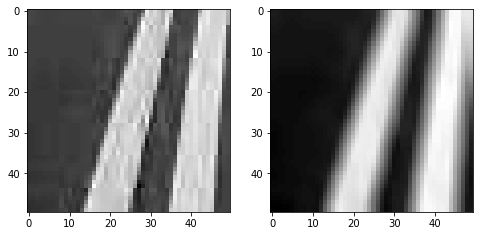

In [15]:
small_blur = cv2.blur(small_gray_road_img, (5,5))

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.imshow(small_gray_road_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(small_blur, cmap='gray')
plt.show()

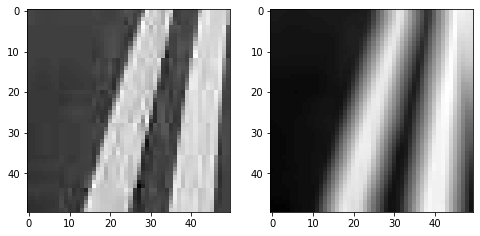

In [16]:
small_blur = cv2.blur(small_gray_road_img, (7,7))

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.imshow(small_gray_road_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(small_blur, cmap='gray')
plt.show()

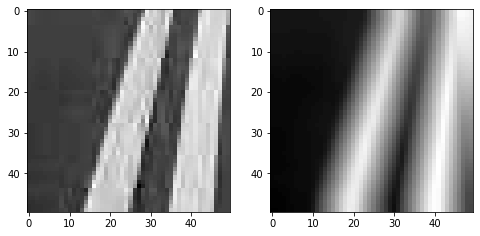

In [17]:
small_blur = cv2.blur(small_gray_road_img, (9,9))

plt.figure(figsize=(8,4))
plt.subplot(1, 2, 1)
plt.imshow(small_gray_road_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(small_blur, cmap='gray')
plt.show()

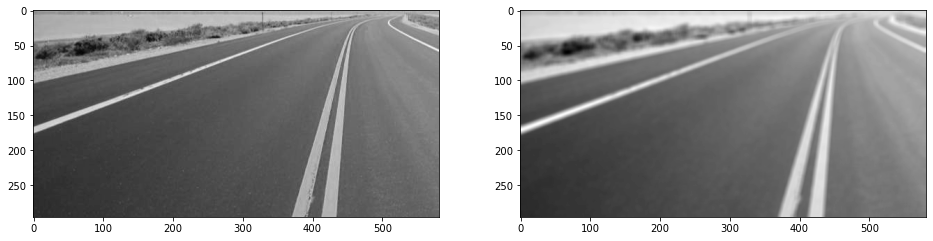

In [18]:
gray_road_blur = cv2.blur(gray_road_img, (7,7))

plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
plt.imshow(gray_road_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(gray_road_blur, cmap='gray')
plt.show()

### Exercise 1: Try different kernel sizes

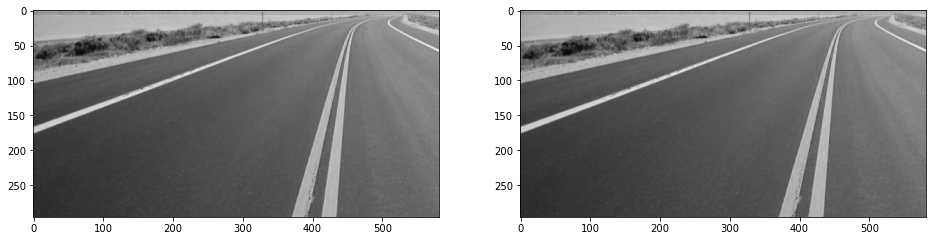

In [19]:
# Try different kernel_size

gray_road_blur = cv2.blur(gray_road_img, (1,1))

plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
plt.imshow(gray_road_img, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(gray_road_blur, cmap='gray')
plt.show()

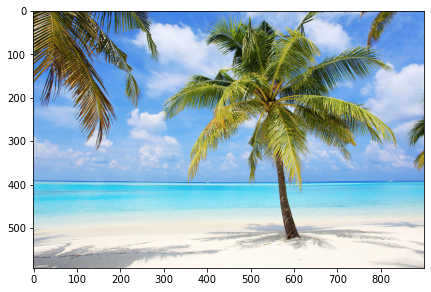

In [20]:
### Blur a Color Image

# read in an image
tree_img = mpimg.imread('palm-trees-tropical-beach.jpg')

plt.figure(figsize=(7,8))
plt.imshow(tree_img)
plt.show()

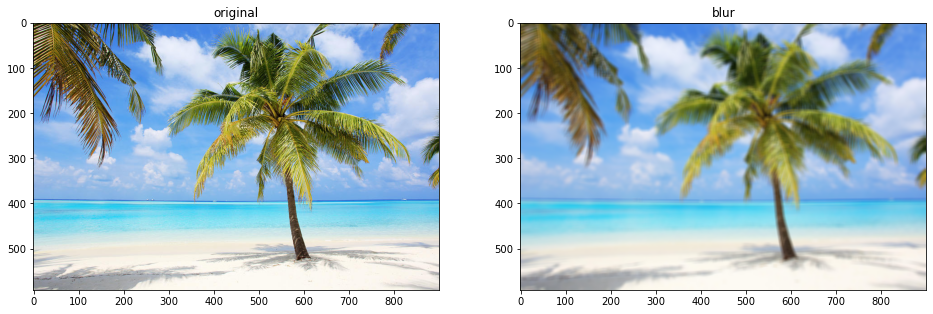

In [21]:
tree_blur_img = cv2.blur(tree_img, (9,9))

plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
plt.imshow(tree_img)
plt.title('original')

plt.subplot(1, 2, 2)
plt.imshow(tree_blur_img)
plt.title('blur')
plt.show()

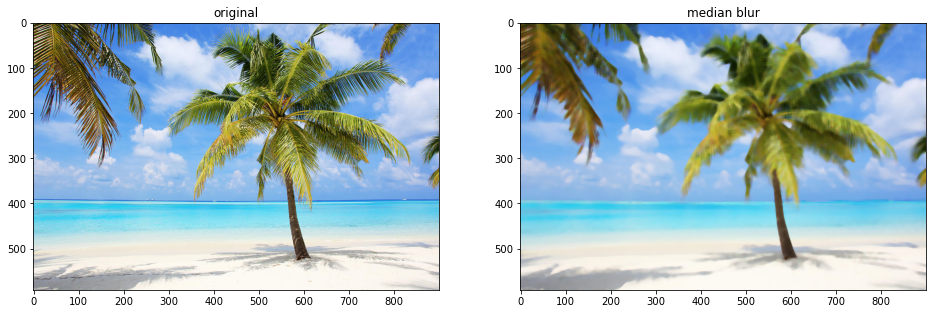

In [22]:
tree_blur_img = cv2.medianBlur(tree_img, 9)

plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
plt.imshow(tree_img)
plt.title('original')

plt.subplot(1, 2, 2)
plt.imshow(tree_blur_img)
plt.title('median blur')
plt.show()

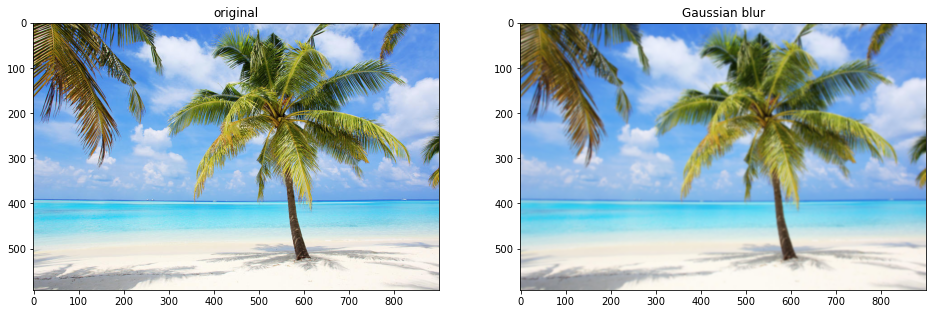

In [23]:
tree_blur_img = cv2.GaussianBlur(tree_img, (9,9), 0)

plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
plt.imshow(tree_img)
plt.title('original')

plt.subplot(1, 2, 2)
plt.imshow(tree_blur_img)
plt.title('Gaussian blur')
plt.show()

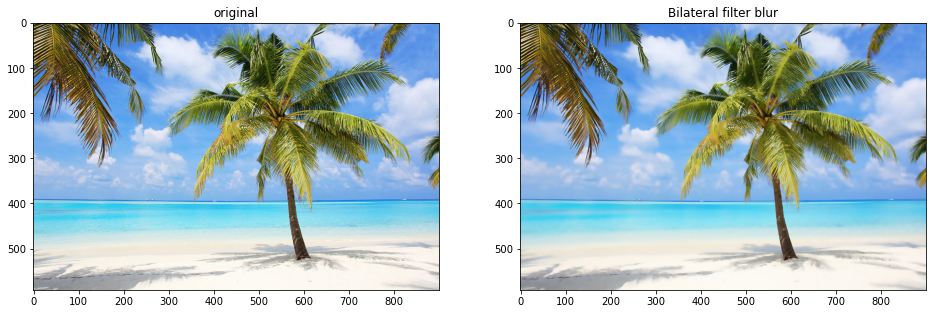

In [24]:
tree_blur_img = cv2.bilateralFilter(tree_img, 9, 75, 75)

plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
plt.imshow(tree_img)
plt.title('original')

plt.subplot(1, 2, 2)
plt.imshow(tree_blur_img)
plt.title('Bilateral filter blur')
plt.show()

### Exercise 2: Blur your own image

Download an image from your phone or the web.  Save it into this directory and blur it to see how it looks.

__NOTE: Be prepared to share your screen so we can see which image you've blurred.__

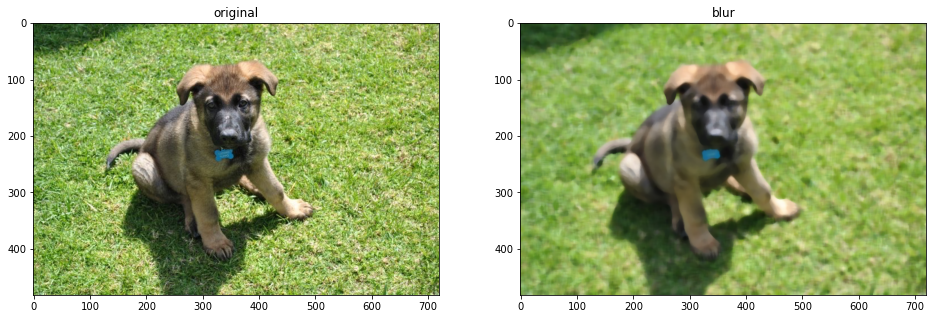

In [25]:
# read in an image - change the name to your image name
my_img = mpimg.imread('my_image.jpg')

#my_blur_img = cv2.blur(my_img, (9,9))
my_blur_img = cv2.medianBlur(my_img, 9)
#my_blur_img = cv2.GaussianBlur(my_img, (11,11), 0)
#my_blur_img = cv2.bilateralFilter(my_img, 9, 75, 75)

plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
plt.imshow(my_img)
plt.title('original')

plt.subplot(1, 2, 2)
plt.imshow(my_blur_img)
plt.title('blur')
plt.show()

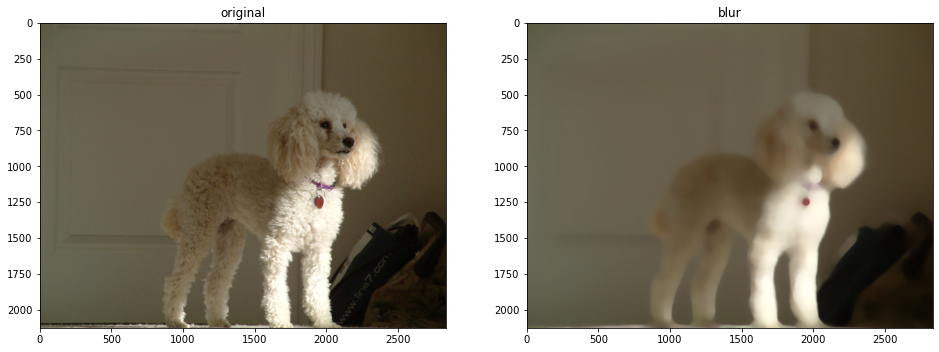

In [10]:
top_of_stairs = mpimg.imread('top_of_stairs.jpg')

top_of_stairs_blur = cv2.medianBlur(top_of_stairs, 81)

plt.figure(figsize=(16,12))
plt.subplot(1, 2, 1)
plt.imshow(top_of_stairs)
plt.title('original')

plt.subplot(1, 2, 2)
plt.imshow(top_of_stairs_blur)
plt.title('blur')
plt.show()

## Can you name that celebrity?

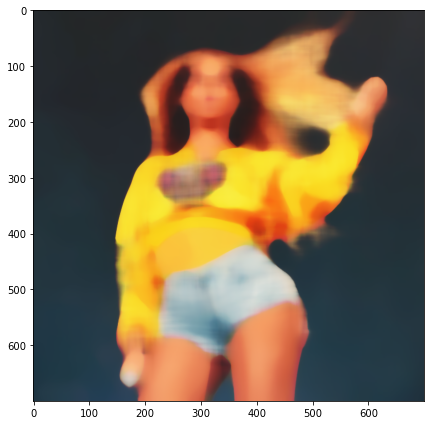

In [38]:
celebrity1_img = mpimg.imread('celebrity1.jpg')

celebrity_blur = cv2.medianBlur(celebrity1_img, 31)
plt.figure(figsize=(7,8))
plt.imshow(celebrity_blur)
plt.show()

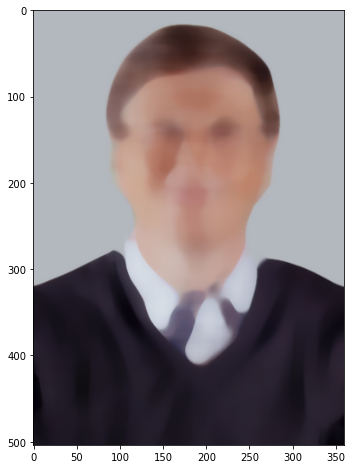

In [27]:
celebrity2_img = mpimg.imread('celebrity2.jpg')

celebrity_blur = cv2.medianBlur(celebrity2_img, 25)
plt.figure(figsize=(7,8))
plt.imshow(celebrity_blur)
plt.show()

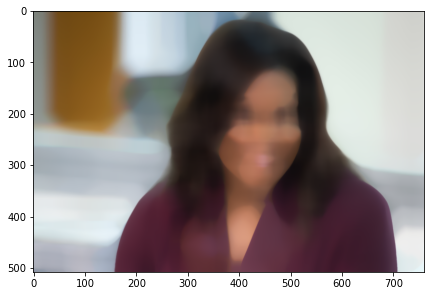

In [28]:
celebrity3_img = mpimg.imread('celebrity3.jpg')

celebrity_blur = cv2.medianBlur(celebrity3_img,  45)
plt.figure(figsize=(7,8))
plt.imshow(celebrity_blur)
plt.show()

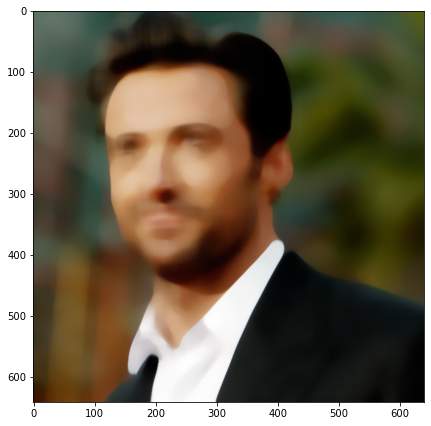

In [29]:
celebrity4_img = mpimg.imread('celebrity4.jpg')

celebrity_blur = cv2.medianBlur(celebrity4_img, 27)
plt.figure(figsize=(7,8))
plt.imshow(celebrity_blur)
plt.show()

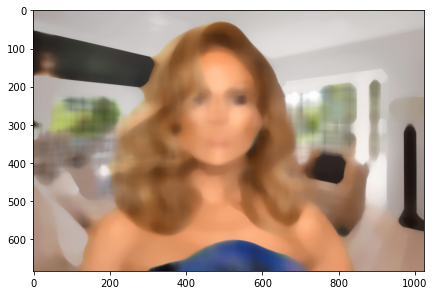

In [30]:
celebrity5_img = mpimg.imread('celebrity5.jpg')

celebrity_blur = cv2.medianBlur(celebrity5_img, 37)
plt.figure(figsize=(7,8))
plt.imshow(celebrity_blur)
plt.show()

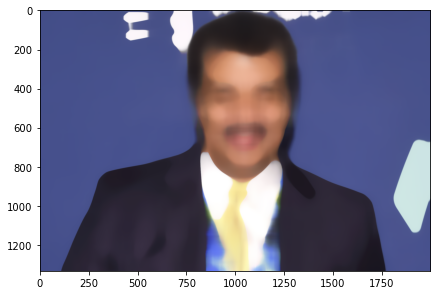

In [31]:
celebrity6_img = mpimg.imread('celebrity6.jpg')

celebrity_blur = cv2.medianBlur(celebrity6_img, 75)
plt.figure(figsize=(7,8))
plt.imshow(celebrity_blur)
plt.show()

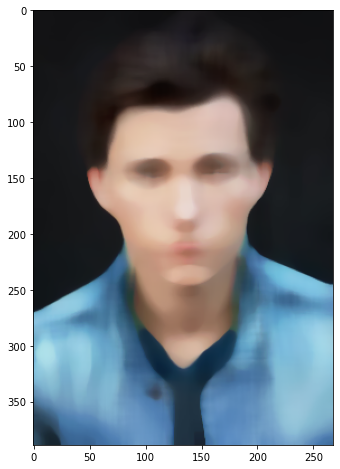

In [32]:
celebrity7_img = mpimg.imread('celebrity7.jpg')

celebrity_blur = cv2.medianBlur(celebrity7_img, 17)
plt.figure(figsize=(7,8))
plt.imshow(celebrity_blur)
plt.show()

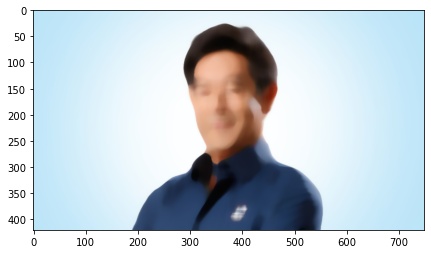

In [33]:
celebrity8_img = mpimg.imread('celebrity8.jpg')

celebrity_blur = cv2.medianBlur(celebrity8_img, 21)
plt.figure(figsize=(7,8))
plt.imshow(celebrity_blur)
plt.show()

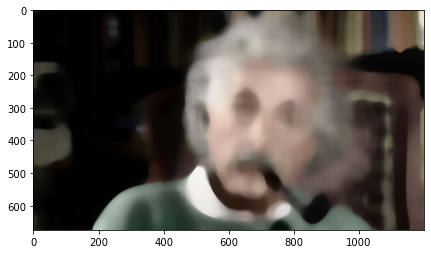

In [34]:
celebrity9_img = mpimg.imread('celebrity9.jpg')

celebrity_blur = cv2.medianBlur(celebrity9_img, 49)
plt.figure(figsize=(7,8))
plt.imshow(celebrity_blur)
plt.show()

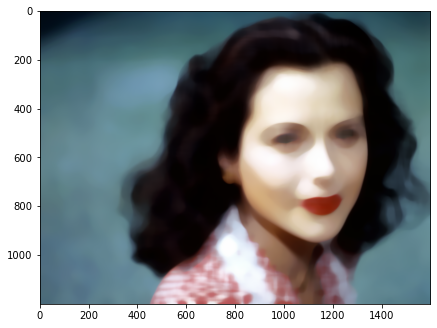

In [35]:
celebrity10_img = mpimg.imread('celebrity10.jpg')

celebrity_blur = cv2.medianBlur(celebrity10_img, 45)
plt.figure(figsize=(7,8))
plt.imshow(celebrity_blur)
plt.show()